Module imports


In [690]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from tqdm import tqdm


Sigmoid Function and its derivative


In [691]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Derivative of the sigmoid function
def dsigmoid(x):
    return np.exp(-x) / (1 + np.exp(-x)) ** 2


Cost function and its derivative

In [692]:
# Cost function
def cost(V, y):
    return (V - y) ** 2


# Derivative of the cost function
def dcost(V, y):
    return 2 * (V - y)


Z function

In [693]:
# The output of a layer (before being passed to the sigmoid
# function)
def z(X, W, B):
    return np.dot(X, W) + B


Forward propagation

In [694]:
# Performs forward propagation and returns the values of z
# and the activations
def forward_prop(X, params):
    W1 = params["W1"]
    B1 = params["B1"]
    W2 = params["W2"]
    B2 = params["B2"]

    Z1 = z(X, W1, B1)
    A1 = sigmoid(Z1)
    Z2 = z(A1, W2, B2)
    A2 = sigmoid(Z2)

    return {
        "Z1": Z1,
        "Z2": Z2,
        "A1": A1,
        "A2": A2,
    }


# Directly get output activations
def outputs(X, params):
    return forward_prop(X, params)["A2"]


Back propagation

In [695]:
# Performs back propagation and returns the adjustment to be
# that should applied to weights and biases
def back_prop(X, y, params, activations):
    W1 = params["W1"]
    B1 = params["B1"]
    W2 = params["W2"]
    B2 = params["B2"]

    Z1 = activations["Z1"]
    Z2 = activations["Z2"]
    A1 = activations["A1"]
    A2 = activations["A2"]

    dZ2 = dsigmoid(Z2) * dcost(A2, y)
    dZ1 = dsigmoid(Z1) * np.dot(dZ2, W2.T)

    dW2 = np.dot(A1.T, dZ2)
    dB2 = np.average(dZ2, axis=0, keepdims=True)

    dW1 = np.dot(X.T, dZ1)
    dB1 = np.average(dZ1, axis=0, keepdims=True)

    return {
        "dW1": dW1,
        "dB1": dB1,
        "dW2": dW2,
        "dB2": dB2,
    }


Training the network

In [696]:
def init_params(n0, n1, n2):
    return {
        "W1": default_rng().random((n0, n1)),
        "B1": default_rng().random((1, n1)),
        "W2": default_rng().random((n1, n2)),
        "B2": default_rng().random((1, n2)),
    }


def update_params(params, adjustments, learning_rate):
    return {
        p: params[p] - adjustments[a] * learning_rate
        for p, a in zip(params, adjustments)
    }


def train(X, y, n_neurons=3, learning_rate=0.1, n_iter=1000):
    n0 = X.shape[1]
    n2 = y.shape[1]
    params = init_params(n0, n_neurons, n2)

    cost_values = []

    for i in tqdm(range(n_iter)):
        results = forward_prop(X, params)
        adjusted_params = back_prop(X, y, params, results)
        params = update_params(params, adjusted_params, learning_rate)

        if i % 10 == 0:
            cost_values.append(np.average(cost(results["A2"], y).flatten()))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(cost_values, label="cost")
    plt.legend()
    plt.show()

    return params


XOR gate example

Training...



100%|██████████| 100000/100000 [00:09<00:00, 10884.07it/s]


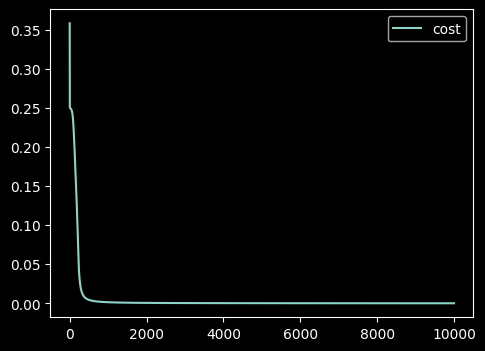


Adjusted parameters:

W1:
[[ 7.19473338  3.25277034  6.26627424 -3.38739991]
 [-3.66089425 -0.40105062  6.19801014  7.56768364]]
B1:
[[ 5.12315258e-01 -8.37450048e-01 -1.12801179e+00  6.30627968e-04]]
W2:
[[-8.14054747]
 [-2.28608706]
 [13.70470876]
 [-9.64261382]]
B2:
[[1.44277156]]


In [697]:
# Input values
X = np.array(
    [
        [0, 0],
        [1, 0],
        [0, 1],
        [1, 1],
    ]
)

# Expected output values depending on X values (eg: with the
# input [0, 0], the network should output [0])
y = np.array(
    [
        [0],
        [1],
        [1],
        [0],
    ]
)

print("Training...\n")
adjusted_params = train(X, y, n_neurons=4, n_iter=100000, learning_rate=0.1)
print("\nAdjusted parameters:\n")
for k, v in adjusted_params.items():
    print("{}:\n{}".format(k, v))


Testing the adjusted params

In [698]:
outputs = [outputs(np.array(input), adjusted_params).item() for input in X]

print("Testing adjusted parameters\n")
for input, output, expected in zip(X, outputs, y):
    print(
        "inputs: {}   output: {} ({})   expected: {}".format(
            input, output >= 0.5, np.round(output, decimals=5), expected.item() >= 0.5
        )
    )


Testing adjusted parameters

inputs: [0 0]   output: False (0.00299)   expected: False
inputs: [1 0]   output: True (0.98919)   expected: True
inputs: [0 1]   output: True (0.98981)   expected: True
inputs: [1 1]   output: False (0.01252)   expected: False


Wow params: while testing I encountered parameters that gave very accurate results so I kept them... This also shows that parameters can easily be stored.

In [699]:
wow_params = {
    "W1": [
        [7.34994504, 5.0280272, -4.91026115, -0.92254707],
        [-3.86841705, 5.29557175, 7.58619768, -0.92105389],
    ],
    "B1": [[0.6566517, -0.54824396, 1.56477407, 0.95665089]],
    "W2": [[-9.24217051], [10.88597922], [-9.2390908], [3.25685478]],
    "B2": [[1.84207686]],
}
